# Introductory applied machine learning (INFR10069) 

# Lab 3: Support Vector Machine (SVM) Classification and Evaluation

In this lab we initially re-examine the spam filtering problem from Lab 2. This time, we train a Logistic Regression model and a linear Support Vector Machine for the spam or non-spam classification task. In the second part of the lab we examine classification evaluation by using a K-nearest neighbour classifier.


All the datasets that you will need for this lab are located within the `datasets` directory (adjacent to this file).

In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
KNeighboursClassifier = KNeighborsClassifier # For the Brits!
%matplotlib inline

/Users/celinadong/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## 1. Spam filtering

### ========== Question 1.1 ==========
Load `spambase_binary.csv` into a pandas DataFrame structure called `spambase`. Display the number of instances and attributes and the first 5 samples. Remember that the attributes have been binarised. The instances have also been shuffled (i.e. their order has been randomised). 

In [12]:
# Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'spambase_binary.csv')
spambase = pd.read_csv(data_path, delimiter=',')

In [3]:
print("Number of attributes: {}".format(spambase.shape[1]))
print("Number of instances: {}".format(spambase.shape[0]))

Number of attributes: 55
Number of instances: 4601


In [4]:
spambase.head()

,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


### ========== Question 1.2 ==========
We are going to use hold-out validation to evaluate our models below. Split the dataset into training and testing subsets using the `train_test_split` [function](http://scikit-learn.org/0.19/modules/generated/sklearn.cross_validation.train_test_split.html) we have used before. Call the resulting matrices `X_train`, `X_test`, `y_train`, `y_test`. Use 90% of the data for training and the remaining 10% for testing. Make sure you don't include the target variable `is_spam` in the input features (`X_train` / `X_test`)!

If you want to be able to reproduce your results exactly, what argument must you remember to set?

In [5]:
X = spambase.drop('is_spam', axis=1)
y = spambase['is_spam']

In [6]:
# Your Code goes here:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size = 0.1, random_state = 0)

***Your answer goes here:***
We must remember to set the random_state argument, otherwise, everytime we run the split function we will get a different random split and thus different data.

### ========== Question 1.3 ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier by using training data. Use the `lbfgs` solver and default settings for the other parameters. Report the classification accuracy on both the training and test sets. Does your classifier generalise well on unseen data?

In [7]:
# Your Code goes here:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
print("Accuracy on training set {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on testing set {:.3f}".format(lr.score(X_test, y_test)))

Accuracy on training set 0.935
Accuracy on testing set 0.928


***Your answer goes here:*** From the results obtained in the accuracy score, the classifier generalises quite well on unseen data. Accuracy obtained on the testing set is comparable to the one obtained in the training set.

### ========== Question 1.4 ==========
Print the coefficients for class 1 for the attributes `word_freq_hp_binarized` and `char_freq_$_binarized`. Generally, we would expect the string `$` to appear in spam, and the string `hp` to appear in non-spam e-mails, as the data was collected from HP Labs. Do the regression coefficients make sense given that class 1 is spam? *Hint: Consider the sigmoid function and how it transforms values into a probability between 0 and 1. Since our attributes are boolean, a positive coefficient can only increase the total sum fed through the sigmoid and thus move the output of the sigmoid towards 1. What can happen if we have continuous, real-valued attributes?*

In [25]:
# lr.coef_ are estimated coefficients for the linear regression problem.
# if multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features)

In [32]:
print("Spambase shape: {}".format(spambase.shape))
# 54 attributes, without counting the target (is_spam)
print("lr.coef_ shape: {}".format(lr.coef_.shape))

Spambase shape: (4601, 55)
lr.coef_ shape: (1, 54)


In [31]:
# Your Code goes here:
hp_idx = spambase.columns.get_loc('word_freq_hp_binarized')
dollar_idx = spambase.columns.get_loc('char_freq_$_binarized')

print("Coefficient for word_freq_hp_binarized: {}".format(lr.coef_[0, hp_idx]))
print("Coefficient for char_freq_$_binarized: {}".format(lr.coef_[0, dollar_idx]))

Coefficient for word_freq_hp_binarized: -2.639347200187426
Coefficient for char_freq_$_binarized: 1.6986427332527392


***Your answer goes here:*** Given that we expect $ to appear in spam (1) and hp in non-spam (0), the coefficients do make sense. Attribute for `char_freq_$_binarized` has positive coefficient, providing support for the spam class 1. Attribute `word_freq_hp_binarized` has a negative coefficient, supporting the non-spam class 0.

### ========== Question 1.5 ==========
Train a [`LinearSVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (i.e. Linear Support Vector classifier) by using default parameters. Report the classification accuracy on the training and test sets. 

In [38]:
# Your Code goes here:
svc = LinearSVC()
svc.fit(X_train, y_train)
print("Classification accuracy on training dataset: {}".format(svc.score(X_train, y_train)))
print("Classification accuracy on testing dataset: {}".format(svc.score(X_test, y_test)))

Classification accuracy on training dataset: 0.9345410628019324
Classification accuracy on testing dataset: 0.9197396963123644


### ========== Question 1.6 ==========
What are the coefficients for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`? Compare these to the ones you found with Logistic Regression.

In [40]:
# Your Code goes here:
print("Coefficient for word_freq_hp_binarized: {}".format(svc.coef_[0, hp_idx]))
print("Coefficient for char_freq_$_binarized: {}".format(svc.coef_[0, dollar_idx]))

Coefficient for word_freq_hp_binarized: -0.8567714915224011
Coefficient for char_freq_$_binarized: 0.5693547472969451


#### Logistic Regression coefficients
Coefficient for word_freq_hp_binarized: -2.639347200187426 <br>
Coefficient for char_freq_$_binarized: 1.6986427332527392 <br><br>

***Your answer goes here:***
The coefficients are consistent in terms of spam and non-spam, but they are less pronounced.

### ========== Question 1.7 ==========
How does a linear SVM relate to Logistic Regression? *Hint: Consider the classification boundary learnt in each model.*

***Your answer goes here:***
They both have linear classification boundaries with respect to the inputs. However, the classification mechanism is fundamentally different. <br> Logistic regression applies a linear transformation to the input, and the result is transformed to a probability by using a non-linear function. <br> Support vector machine classification is based on the similarity of a new data point to a few training instances known as support vectors.

### ========== Question 1.8 ==========
By using the [`SVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class train two new support vector classifiers with Gaussian (`rbf`) and polynomial (`poly`) kernels. Again, report classification accuracies on training and test sets and compare with your results from Question 1.5.

In [49]:
# Your Code goes here:
svm_rbf = SVC(kernel='rbf') # Gaussian
svm_rbf.fit(X_train, y_train)
print("RBF SVC classification accuracy on training set: {}".format(svm_rbf.score(X_train, y_train)))
print("RBF SVC classification accuracy on testing set: {}".format(svm_rbf.score(X_test, y_test)))

svm_poly = SVC(kernel='poly', degree=2) # polynomial kernel, degree of the polynomial function
svm_poly.fit(X_train, y_train)
print("Poly SVC classification accuracy on training set: {}".format(svm_poly.score(X_train, y_train)))
print("Poly SVC classification accuracy on testing set: {}".format(svm_poly.score(X_test, y_test)))

RBF SVC classification accuracy on training set: 0.9342995169082126
RBF SVC classification accuracy on testing set: 0.93058568329718
Poly SVC classification accuracy on training set: 0.8729468599033816
Poly SVC classification accuracy on testing set: 0.8741865509761388


***Your answer goes here:***
It appears that there is a very slight benefit to using a radial basis kernel (Gaussian rbf). However, we need to perform a cross-validation and try different parameters for these kernels before making any claims.

# 2. Performance assessment
We will now look at a few ways of assessing the performance of a classifier. To do so we will introduce a new data set, the [Splice](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) data set. The classification task is to identify `intron` and `exon` boundaries on gene sequences. For more information, you can read the dataset description in the link. The class attribute can take on 3 values: `N`, `IE` and `EI`.

### ========== Question 2.1 ==========
Load the `splice_train.csv` and `splice_test.csv` into two separate dataframes. Display the shape and first 10 instances for each dataframe.

In [56]:
# Load Splice Train Here
data_path = os.path.join(os.getcwd(), 'datasets', 'splice_train.csv')
splice_train = pd.read_csv(data_path, delimiter=',')

# Your Code goes here:
print("Number of instances in training test: {}".format(splice_train.shape[0]))
print("Number of attributes in training test: {}".format(splice_train.shape[1]))
splice_train.head(10)

Number of instances in training test: 2935
Number of attributes in training test: 61


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,T,G,A,T,G,C,C,T,G,C,...,C,C,C,C,C,T,G,A,G,N
1,G,C,C,C,A,T,A,T,T,C,...,T,G,G,A,C,T,T,C,C,N
2,G,G,C,T,G,C,C,G,G,A,...,A,C,T,G,T,G,T,C,T,EI
3,C,T,G,C,T,G,C,T,G,G,...,G,G,C,T,G,C,T,G,G,EI
4,T,C,C,C,C,G,A,G,C,C,...,A,T,C,A,G,C,G,C,A,N
5,A,T,A,C,C,T,G,C,C,C,...,A,T,G,G,G,G,T,C,T,EI
6,T,T,C,T,C,C,A,T,T,T,...,G,A,T,A,T,C,C,A,T,IE
7,A,A,A,G,A,T,G,A,T,A,...,A,A,G,C,C,C,T,T,C,EI
8,C,C,A,A,T,C,C,C,A,G,...,G,G,C,G,G,C,C,T,G,N
9,G,C,C,G,T,G,G,T,T,T,...,A,A,G,G,C,T,C,C,T,EI


In [57]:
# Load Splice Test Here
splice_test = pd.read_csv('datasets/splice_test.csv', delimiter=',')

# Your Code goes here:
print("Number of instances in testing test: {}".format(splice_test.shape[0]))
print("Number of attributes in testing test: {}".format(splice_test.shape[1]))
splice_test.head(10)

Number of instances in testing test: 255
Number of attributes in testing test: 61


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,C,C,C,T,C,C,C,A,C,T,...,C,C,C,A,G,T,G,C,A,IE
1,C,A,C,T,G,A,G,T,T,G,...,G,A,A,C,C,A,G,T,G,N
2,C,A,G,A,C,T,G,G,G,T,...,A,G,A,C,C,A,C,A,G,EI
3,A,G,T,G,A,T,T,G,A,C,...,T,A,C,C,A,A,A,G,A,N
4,G,T,A,G,A,C,A,C,C,T,...,A,T,C,C,C,T,T,C,T,IE
5,C,T,T,G,T,T,A,C,A,G,...,C,C,G,A,G,A,A,C,C,N
6,C,G,T,C,A,A,T,C,A,A,...,A,A,A,A,T,T,A,A,G,EI
7,G,T,C,C,G,T,G,C,C,T,...,G,C,C,C,T,T,T,G,C,N
8,A,T,A,C,C,T,G,T,A,G,...,C,G,T,T,T,A,T,A,T,N
9,G,G,T,G,G,G,C,C,A,A,...,C,A,G,G,C,A,T,G,G,N


### ========== Question 2.2 ========== 
Convert the categorical attributes into numeric ones by using the [`get_dummies(...)`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.get_dummies.html) function from pandas. Make sure to take care of the values `D`, `N`, `S`, `R` (see the [documentation](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) for the data). *Hint: checkout the pandas [`CategoricalDtype`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html#pandas.api.types.CategoricalDtype)*. Also, make sure to not transform the target variable (`class`).

In [78]:
# Your Code goes here:
cat_attributes = CategoricalDtype(categories=['A', 'C', 'T', 'G', 'D', 'N', 'R', 'S'])
splice_train_onehot = pd.get_dummies(data=splice_train.drop('class', axis=1).astype(cat_attributes))
splice_test_onehot = pd.get_dummies(data=splice_test.drop('class', axis=1).astype(cat_attributes))

In [79]:
splice_train_onehot.shape, splice_test_onehot.shape

((2935, 480), (255, 480))

### ========== Question 2.3 ==========
Store the training and testing data into numpy arrays `X_train`, `y_train`, `X_test` and `y_test`. Display the shapes of the four arrays.

In [89]:
# Your Code goes here:
X_train = splice_train_onehot.values # numpy arrays - .values
y_train = splice_train['class']
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_test = splice_test_onehot.values
y_test = splice_test['class']
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (2935, 480)
y_train shape: (2935,)
X_test shape: (255, 480)
y_test shape: (255,)


### ========== Question 2.4 ==========
Familiarise yourself with [Nearest Neighbours Classification](http://scikit-learn.org/0.19/modules/neighbors.html#classification). Use a [`KNeighborsClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
by using a single neighbour. Report the classification accuracy on the training set.

In [96]:
# Your Code goes here:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Classification accuracy on training set: {}".format(knn.score(X_train, y_train)))

Classification accuracy on training set: 0.9996592844974447


### ========== Question 2.5 ==========
Is the above result meaningful? Why is testing on the training data a particularly bad idea for a 1-nearest neighbour classifier? Do you expect the performance of the classifier on a test set to be as good?

***Your answer goes here:*** The above result is not very meaningful because the accuracy on the training set is almost perfect. <br> The 1-nearest neighbour classifier is a bad idea because it will classify each instance to the class of the nearest instance in the training set. If we test the classifier on the training set, then each input will be classified correctly since the closest instance in the training set is the instance itself. <br> The performance of the classifier on a test set is expected to be lower.

### ========== Question 2.6 ==========
Now report the classification accuracy on the test set and check your expectations.

In [97]:
# Your Code goes here:
print("Classification accuracy on testing set: {}".format(knn.score(X_test, y_test)))

Classification accuracy on testing set: 0.7450980392156863


### ========== Question 2.7 ==========
Plot a histogram of the target variable (i.e. `class`) in the test set. *Hint: matplotlib won't allow you to plot a histogram for categorical values. Instead, you can use Pandas' built-in bar plot tool in conjunction with the [`value_counts`](http://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.value_counts.html).* 

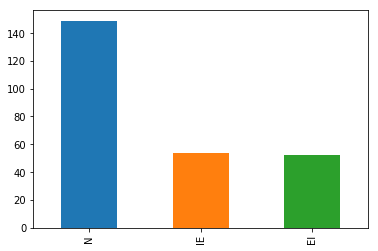

In [102]:
# Your Code goes here:
ax = pd.value_counts(values=splice_test['class']).plot(kind='bar')

#class_counts = splice_test["class"].value_counts()
#ax = class_counts.plot(kind="bar")

### ========== Question 2.8 ==========
What would be the accuracy of the classifier, if all points were labelled as `N`? 

**Pro Tip** - You should always use a ['Dummy Model'](http://scikit-learn.org/0.19/modules/model_evaluation.html#dummy-estimators) (a ridiculously simple model) like this to compare with your 'real' models. It's very common for complex models to be outperformed by a simple model, such as predicting the most common class. When complex models are outperformed by 'Dummies', you should investigate why: often there was an issue with the code, the data, or the way the model works was misunderstood.

In [107]:
# Your Code goes here:

#dummy = DummyClassifier(strategy='most_frequent', random_state=0)
#If all points were labelled as `N`, the accuracy would be quite high given that the majority of the original data is labelled as `N`.
class_counts = splice_test['class'].value_counts()
print("Baseline classifier that always predicts N would have accuracy score: {}".format(class_counts['N']/sum(class_counts.values)))

Baseline classifier that always predicts N would have accuracy score: 0.5843137254901961


### ========== Question 2.9 ==========
Now we want to explore the effect of the `k` parameter. To do this, train the classifier multiple times, each time setting the KNN option to a different value. Try `5`, `10`, `50`, `100`, `200`, `500`, `1000`, `1500` and `2000` and test the classifier on the test set. How does the k parameter affect the results? *Hint: Consider how well the classifier is generalising to previously unseen data, and how it compares to the dumb prediction accuracy.*

In [110]:
# Your Code goes here:
k_neighbors = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]
accuracy_scores = []
for k in k_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    accuracy_scores.append(score)
    print("Accuracy with {} neighbors: {}".format(k, score))


Accuracy with 5 neighbors: 0.7725490196078432
Accuracy with 10 neighbors: 0.8156862745098039
Accuracy with 50 neighbors: 0.8705882352941177
Accuracy with 100 neighbors: 0.8941176470588236
Accuracy with 200 neighbors: 0.9019607843137255
Accuracy with 500 neighbors: 0.9450980392156862
Accuracy with 1000 neighbors: 0.9686274509803922
Accuracy with 1500 neighbors: 0.6980392156862745
Accuracy with 2000 neighbors: 0.5843137254901961


***Your answer goes here:*** The model generalises quite well on unseen data as k increases up to a point. From a certain number of k neighbors, the model's accuracy decreses. Ask k gets too large, we end up predicting the mean class for every data point and thus, the performance drops considerably.

### ========== Question 2.10 ==========
Plot the results (k-value on the x-axis and classification accuracy on the y-axis), making sure to mark the axes. Can you conclude anything from observing the plot?

In [124]:
plt.show?

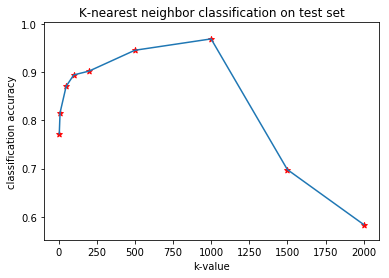

In [125]:
# Your Code goes here:
plt.scatter(x=k_neighbors, y=accuracy_scores, marker='*', color='r')
plt.plot(k_neighbors, accuracy_scores)
plt.xlabel('k-value')
plt.ylabel('classification accuracy')
plt.title('K-nearest neighbor classification on test set')
plt.show()

***Your answer goes here:***
Increasing k improves the performance of the classifier up to the point when k=1000. The model reaches its peak performance on unseen data (test set) when there are 1000 neighbors. If we increase the number of neighbors, performance decreases rapidly. This is because the classifier uses all training samples to classify a new instance, and consequently classifies all instances to the dominant class, just like the dummy baseline model.

### ========== Question 2.11 ==========
Select best value for `k` from Questions 2.9 and 2.10 and plot the normalised confusion matrix on the test set (you may use the provided function). Then plot the confusion matrix for a 5-nearest neighbour classifier. What do you observe?

In [126]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')

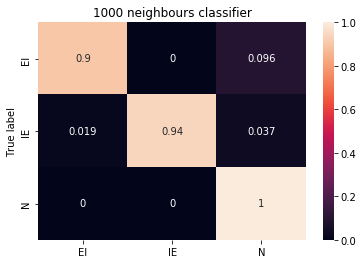

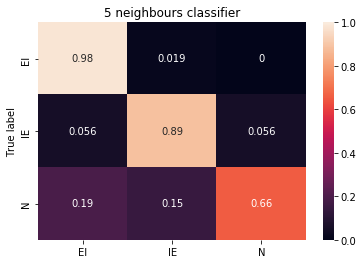

In [133]:
# Your Code goes here:
for k in [1000, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    cm_norm = cm / cm.sum(axis=1)[:, np.newaxis] # normalize confusion matrix
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=knn.classes_, title = str(k) + ' neighbours classifier')

***Your answer goes here:*** We observe that when k=1000, classifier predicts all the instances labelled `N` correctly. That is, with 1000 neighbours, the `N` class is almost always predicted correctly, but the other two classes are not (although the accuracy for the other two classes is still quite high). <br> When k=5, model does not predict `N` class very well, but it predicts class `EI` much better than when there are more neighbors. <br><br> The 5 neighbours solution is a more 'complex model' and the mean class accuracy seems to be worse. The choice of model will depend on the goals. If we don't care about predicting `IE` correctly, the `1000` neighbour model gives greater overall accuracy and is a simpler model. However, our application may tolerate a drop in overall accuracy in return for better 'class accuracy' in a particular output - in this case, we would consider the more complex 5 neighbour model to get better `EI` accuracy.

### ========== Question 2.12 ==========
Read about the [logarithmic loss](http://scikit-learn.org/0.19/modules/generated/sklearn.metrics.log_loss.html) (or cross-entropy loss). It is often the error metric used when we are trying to optimise classification models.

This metric takes as input the true labels and the estimated probability distributions (bernoulli or multinomial). It makes sense to use this metric when we are interested not only in the predicted labels, but also in the confidence with which these labels are predicted.

For instance, think of the situation where you have a single test point and two classifiers. Both classifiers predict the label correctly, however classifier A predicts that the test point belongs to the class with probability 0.55, whereas classifier B predicts the correct class with probability 0.99. Classification accuracy would be the same for the two classifiers (why?) but the `log_loss` metric would indicate that classifier B should be favoured.

Produce a scatter plot similar to the one in Question 2.10 but this time show `log_loss` on your y axis. Which value for `k` would you pick if `log_loss` was the error metric? Comment on why this might happen, and which metric would be a better evaluator of performance.

Logarithmic loss for 5 neighbors: 1.356143913939002
Logarithmic loss for 10 neighbors: 0.47333970459252733
Logarithmic loss for 50 neighbors: 0.5285425000909066
Logarithmic loss for 100 neighbors: 0.5585685730819102
Logarithmic loss for 200 neighbors: 0.6007253896781405
Logarithmic loss for 500 neighbors: 0.6718619638419789
Logarithmic loss for 1000 neighbors: 0.7535336458878122
Logarithmic loss for 1500 neighbors: 0.8177287055931994
Logarithmic loss for 2000 neighbors: 0.8753647883393483


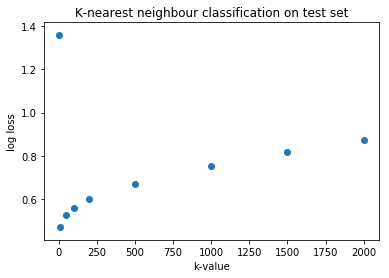

In [161]:
# Your Code goes here:
k_neighbors = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]
log_losses = []
for k in k_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict_proba(X_test)
    loss = log_loss(y_test, pred)
    log_losses.append(loss)
    print("Logarithmic loss for {} neighbors: {}".format(k, loss))

plt.scatter(x=k_neighbors, y=log_losses)
plt.xlabel('k-value')
plt.ylabel('log loss')
plt.title('K-nearest neighbour classification on test set')
plt.show()

***Your answer goes here:*** Looking at the logarithmic loss for each possible k value, we observe that for k=10, the classifier has the lowest generalisation log loss. Comparing this plot with the accuracy one, they are both quite different. <br> The 10-NN model has lower accuracy (predicts many instances wrong), but has better judgement of its confidence in the prediction. <br> The 1000-NN model has higher accuracy (gets more instances correct), but its judgement is quite bad. That is, for instances where it predicts the class incorrectly, it predicts such wrong label with high confidence, which impacts the log loss heavily. 

### ========== Question 2.13 ==========

Could you use the `log_loss` metric to evaluate the performance of an SVM classifier? Explain.

***Your answer goes here:*** We could use the `log_loss` megtric to evaluate the performance of SVM classifiers but is not preferred. SVMs are not probabilistic classifiers (i.e. they only yield a classification decision and not a posterior probability distribution) and are trained to minimise a distance metric. Other classifiers, like logistic regression, explicitly try to minimise the logarithmic loss. It would make sense that these latter models report a better log loss than an SVM, but the SVM could still be producing 'better' predictions e.g. rankings.